# Utils to visualize Label on image

In [275]:
import numpy as np
import glob
from skimage import io
from IPython.display import display, Markdown, Latex
import sys
import os

# Utils

In [276]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

def show_n_images(imgs, cmap='gray', titles = None, enlarge = 20,
                  isaxis = True):
    
    plt.set_cmap(cmap);
    
    n = len(imgs);
    gs1 = gridspec.GridSpec(1, n);
    
    fig1 = plt.figure(); # create a figure with the default size 
    fig1.set_size_inches(enlarge, 2*enlarge);
    
    if not isaxis:
        plt.axis("off");
        
         
    for i in range(n):

        ax1 = fig1.add_subplot(gs1[i]);

        ax1.imshow(imgs[i], interpolation='none');
        if (titles is not None):
            ax1.set_title(titles[i], fontsize=30, fontweight="bold");

    plt.show();

In [277]:
from skimage import io, color, img_as_float
from skimage.exposure import adjust_gamma
def show_lable_on_image(test_img, label_im):
        
        #Creates an image of original image with segmentation overlay
        
        ones = np.argwhere(label_im == 1)
        twos = np.argwhere(label_im == 2)
        threes = np.argwhere(label_im == 3)
        fours = np.argwhere(label_im == 4)

        new_image = img_as_float(test_img/test_img.max())
        
        red_multiplier = [1, 0.2, 0.2]
        green_multiplier = [0.35,0.75,0.25]
        blue_multiplier = [0,0.25,0.9]
        yellow_multiplier = [1,1,0.25]

        # change colors of segmented classes
        for i in range(len(ones)):
            
            new_image[ones[i][0]][ones[i][1]] = red_multiplier
        for i in range(len(twos)):
            new_image[twos[i][0]][twos[i][1]] = green_multiplier
        for i in range(len(threes)):
            new_image[threes[i][0]][threes[i][1]] = blue_multiplier
        for i in range(len(fours)):
            new_image[fours[i][0]][fours[i][1]] = yellow_multiplier

        return new_image


In [278]:

def show_lable_on_image2(test_img, label_im):
        
    #Creates an image of original brain with segmentation overlay
        
    intensity = test_img.astype(np.float32)
    intensity = intensity/intensity.max()#(intensity - intensity.min()) / (intensity.max() - intensity.min())

    # some 'spectrum' data, normalized between 0 and 1
    spectrum = label_im/4.

    # look up RGB values from the 'jet' colormap
    RGBA = plt.cm.jet(spectrum)
    # fill the A(lpha) channel with the array of intensity data
    RGBA[...,3] = intensity


    return RGBA


In [279]:
import matplotlib
def show_lable_on_image3(test_img, label_im):
        
    #Creates an image of original brain with segmentation overlay
        
    intensity = test_img.astype(np.float32)
    intensity = (intensity - intensity.min()) / (intensity.max() - intensity.min())

    # some 'spectrum' data, normalized between 0 and 1
    spectrum = label_im/4.

    # another way to represent spectral and intensity data is using a 2D 
    # HSV color space
    HSV = np.ones(intensity.shape + (3,))

    # we represent the spectral information using hue...
    HSV[...,0] = spectrum
    HSV[...,1] = intensity
    HSV[...,2] = intensity
    # convert back into rgb color space
    HSV = matplotlib.colors.hsv_to_rgb(HSV)


    return HSV


In [280]:
import matplotlib
def show_lable_on_image4(img_in, label_im):
        
    alpha = 0.6

    img_color = img_in.copy()
    if len(img_in.shape)==3:
        test_img = img_in[:,:,0].copy()
        
    else:
        test_img = img_in.copy()
        
        
    img = img_as_float(test_img/test_img.max())
    rows, cols = img.shape
    if len(img_in.shape)==2:
        # Construct RGB version of grey-level image
        img_color = np.dstack((img, img, img))
    
    

    # Construct a colour image to superimpose
    color_mask = np.zeros((rows, cols, 3))
    red_multiplier = [1, 0.2, 0.2]
    green_multiplier = [0.35,0.75,0.25]
    blue_multiplier = [0,0.25,0.9]
    yellow_multiplier = [1,1,0.25]
        
    color_mask[label_im==1] = red_multiplier#[1, 0, 0]  # Red block
    color_mask[label_im==2] = green_multiplier#[0, 1, 0] # Green block
    color_mask[label_im==3] = blue_multiplier#[0, 0, 1] # Blue block
    color_mask[label_im==4] = yellow_multiplier#[0, 1, 1] # Blue block

    

    # Convert the input image and color mask to Hue Saturation Value (HSV)
    # colorspace
    img_hsv = color.rgb2hsv(img_color)
    color_mask_hsv = color.rgb2hsv(color_mask)

    # Replace the hue and saturation of the original image
    # with that of the color mask
    img_hsv[..., 0] = color_mask_hsv[..., 0]
    img_hsv[..., 1] = color_mask_hsv[..., 1] * alpha

    img_masked = color.hsv2rgb(img_hsv)

    return img_masked

In [309]:

def show_lable_on_image5(imgs, label, titles=''):
        
    #Creates an image of original brain with segmentation overlay
        
    # plotting
    fig, ax = plt.subplots(1, len(imgs), figsize=(5*len(imgs),5))#, sharex=True, sharey=True)

    for i in range(len(imgs)):
        
        ax[i].imshow(imgs[i])#, cmap='gray')
        ax[i].set_title(titles[i], fontsize=14)
        ax[i].imshow(label[i], alpha=0.4, cmap='jet')

    plt.show()


# Load data

In [282]:
imgs = os.listdir('imgs')
imgs

['im1.jpg',
 'im1_mask.bmp',
 'im2.jpg',
 'im2_mask.bmp',
 'im3.jpg',
 'im3_mask.bmp',
 'im4.jpg',
 'im4_mask.bmp',
 'im5_mask.bmp',
 'img5.jpg']

In [283]:
masks = [im for im in imgs if '_mask' in im]
imgs = [im for im in imgs if '_mask' not in im]
masks, imgs

(['im1_mask.bmp',
  'im2_mask.bmp',
  'im3_mask.bmp',
  'im4_mask.bmp',
  'im5_mask.bmp'],
 ['im1.jpg', 'im2.jpg', 'im3.jpg', 'im4.jpg', 'img5.jpg'])

In [284]:
imgs = [plt.imread('imgs\\' + im) for im in imgs]

In [285]:
masks = [plt.imread('imgs\\' + im) for im in masks]

## Original images

<Figure size 432x288 with 0 Axes>

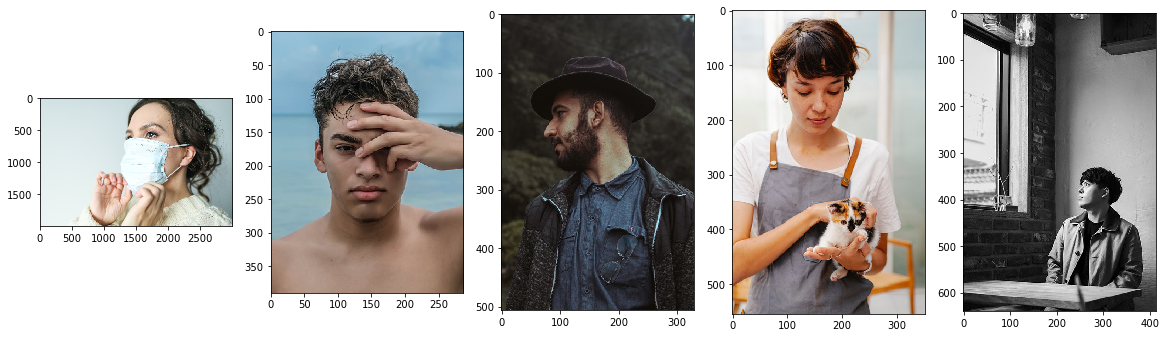

In [286]:
display(Markdown('## Original images' ))
show_n_images(imgs);

## Original masks

<Figure size 432x288 with 0 Axes>

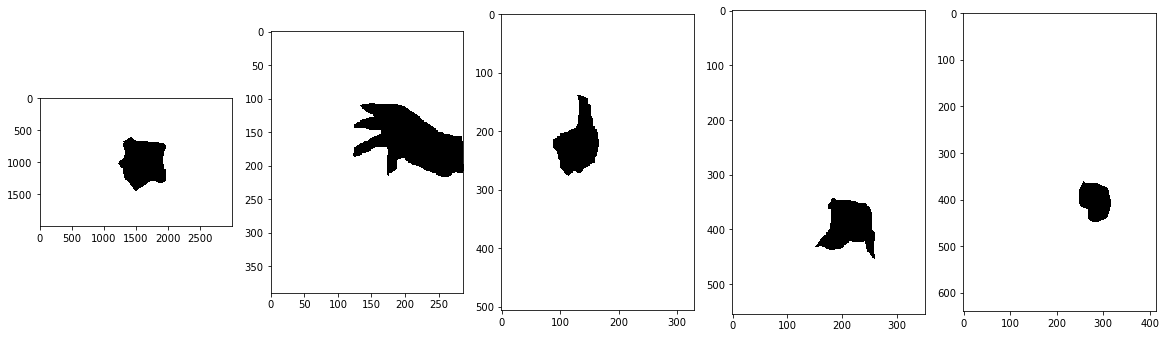

In [287]:
display(Markdown('## Original masks' ))
show_n_images(masks);

## Original masks

<Figure size 432x288 with 0 Axes>

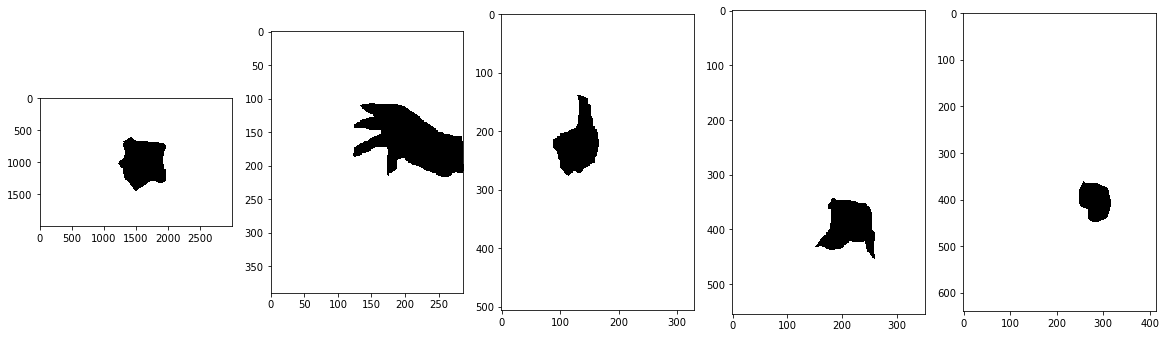

In [288]:
display(Markdown('## Original masks' ))
show_n_images([im[:,:,0] for im in masks]);

In [289]:
masks = [1- im[:,:,0]//255 for im in masks]

In [290]:
np.unique(masks[0].flatten(), return_counts=True)

(array([0, 1], dtype=uint8), array([5561940,  438060], dtype=int64))

## Original masks

<Figure size 432x288 with 0 Axes>

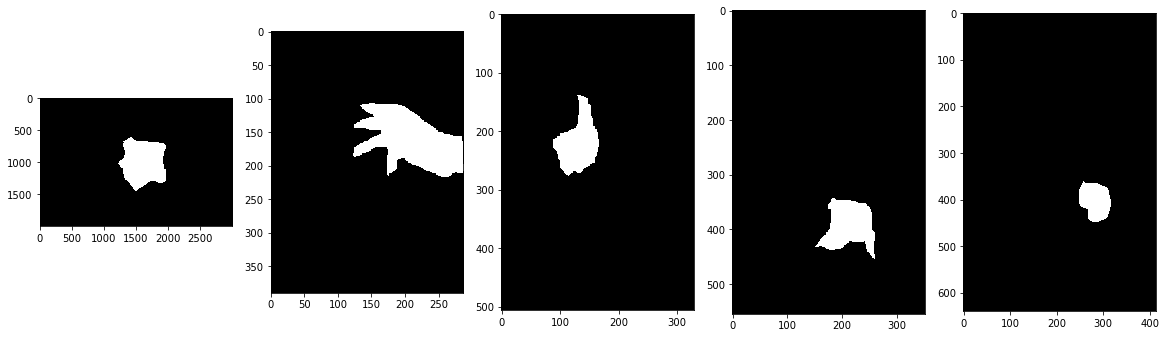

In [291]:
display(Markdown('## Original masks' ))

show_n_images(masks);

In [292]:
masks[0].shape

(2000, 3000)

## images with labels

<Figure size 432x288 with 0 Axes>

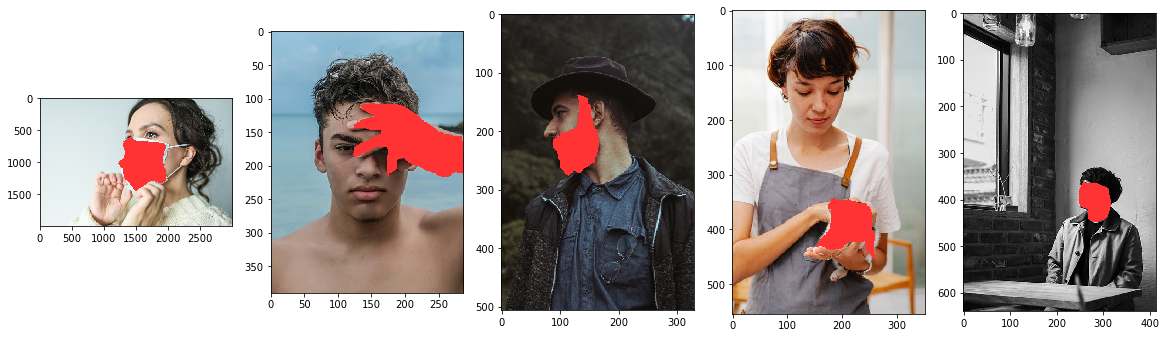

In [297]:
display(Markdown('## images with labels' ))
show_n_images([show_lable_on_image(imgs[i],masks[i]) for i in range(5)]);

## images with labels

<Figure size 432x288 with 0 Axes>

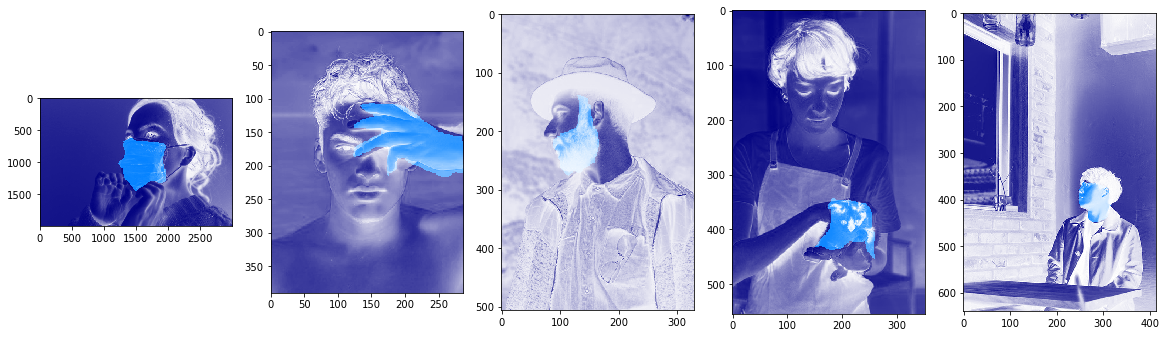

In [298]:
display(Markdown('## images with labels' ))
show_n_images([show_lable_on_image2(imgs[i][:,:,0],masks[i]) for i in range(5)]);

## images with labels

<Figure size 432x288 with 0 Axes>

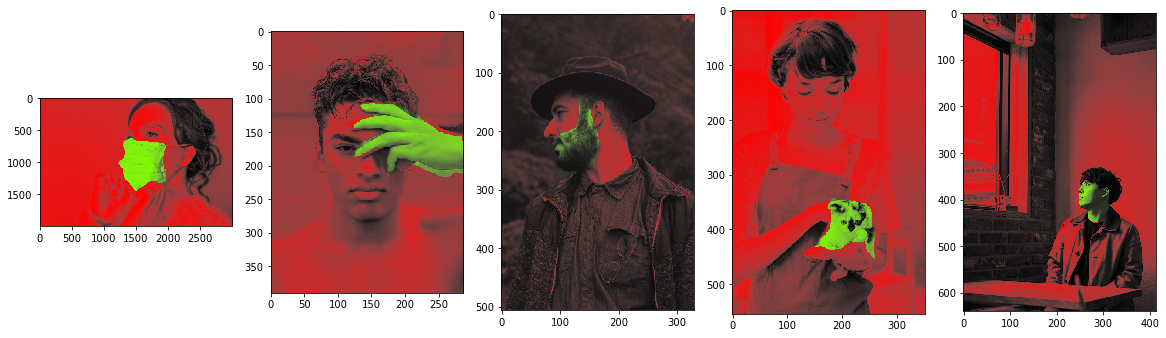

In [299]:
display(Markdown('## images with labels' ))
show_n_images([show_lable_on_image3(imgs[i][:,:,0],masks[i]) for i in range(5)]);

<Figure size 432x288 with 0 Axes>

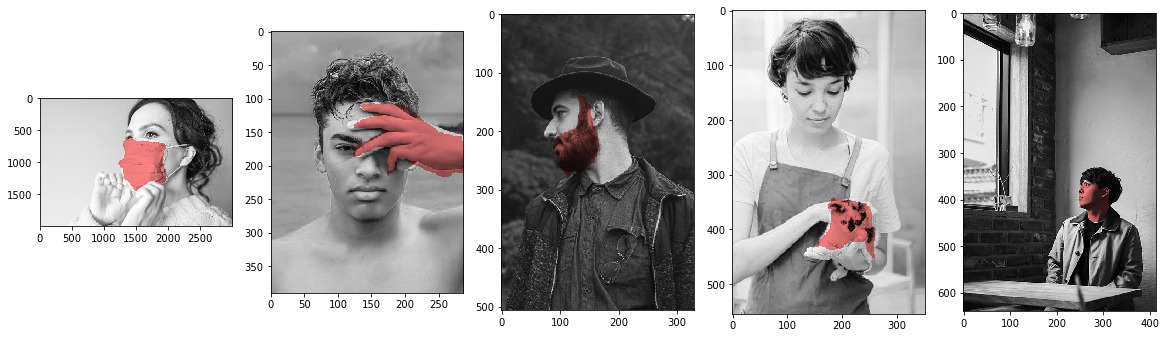

In [300]:

show_n_images([show_lable_on_image4(imgs[i][:,:,0],masks[i]) for i in range(5)]);

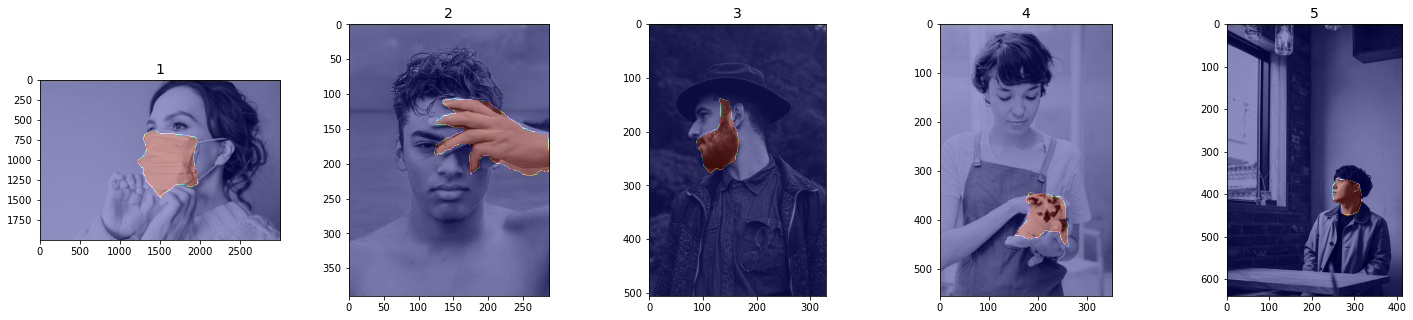

In [310]:
show_lable_on_image5([im[:,:,0] for im in imgs], masks, titles=['1','2','3','4','5'])